In [12]:
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

In [21]:
def reshape_polygon(poly):
    poly = np.array(poly)
    _ , l = poly.shape
    return poly.reshape(l//2, 2).transpose()

def conv_bbox(bbox):
    xmi, ymi, xma, yma = bbox
    return np.array([[xmi,ymi],[xmi,yma],[xma,yma],[xma,ymi],[xmi,ymi]]).transpose()

In [29]:
dataset = np.random.choice(glob.glob('/home/ubuntu/tiled-data/train/*'))
print(f'Dataset is {os.path.basename(dataset)}')

Dataset is SALCT1


In [30]:
with open(os.path.join(dataset,'segs.json')) as f:
    data = json.load(f)
num_tiles=len(data)
print(f'{num_tiles} tiles in {dataset}')

10275 tiles in /home/ubuntu/tiled-data/train/SALCT1


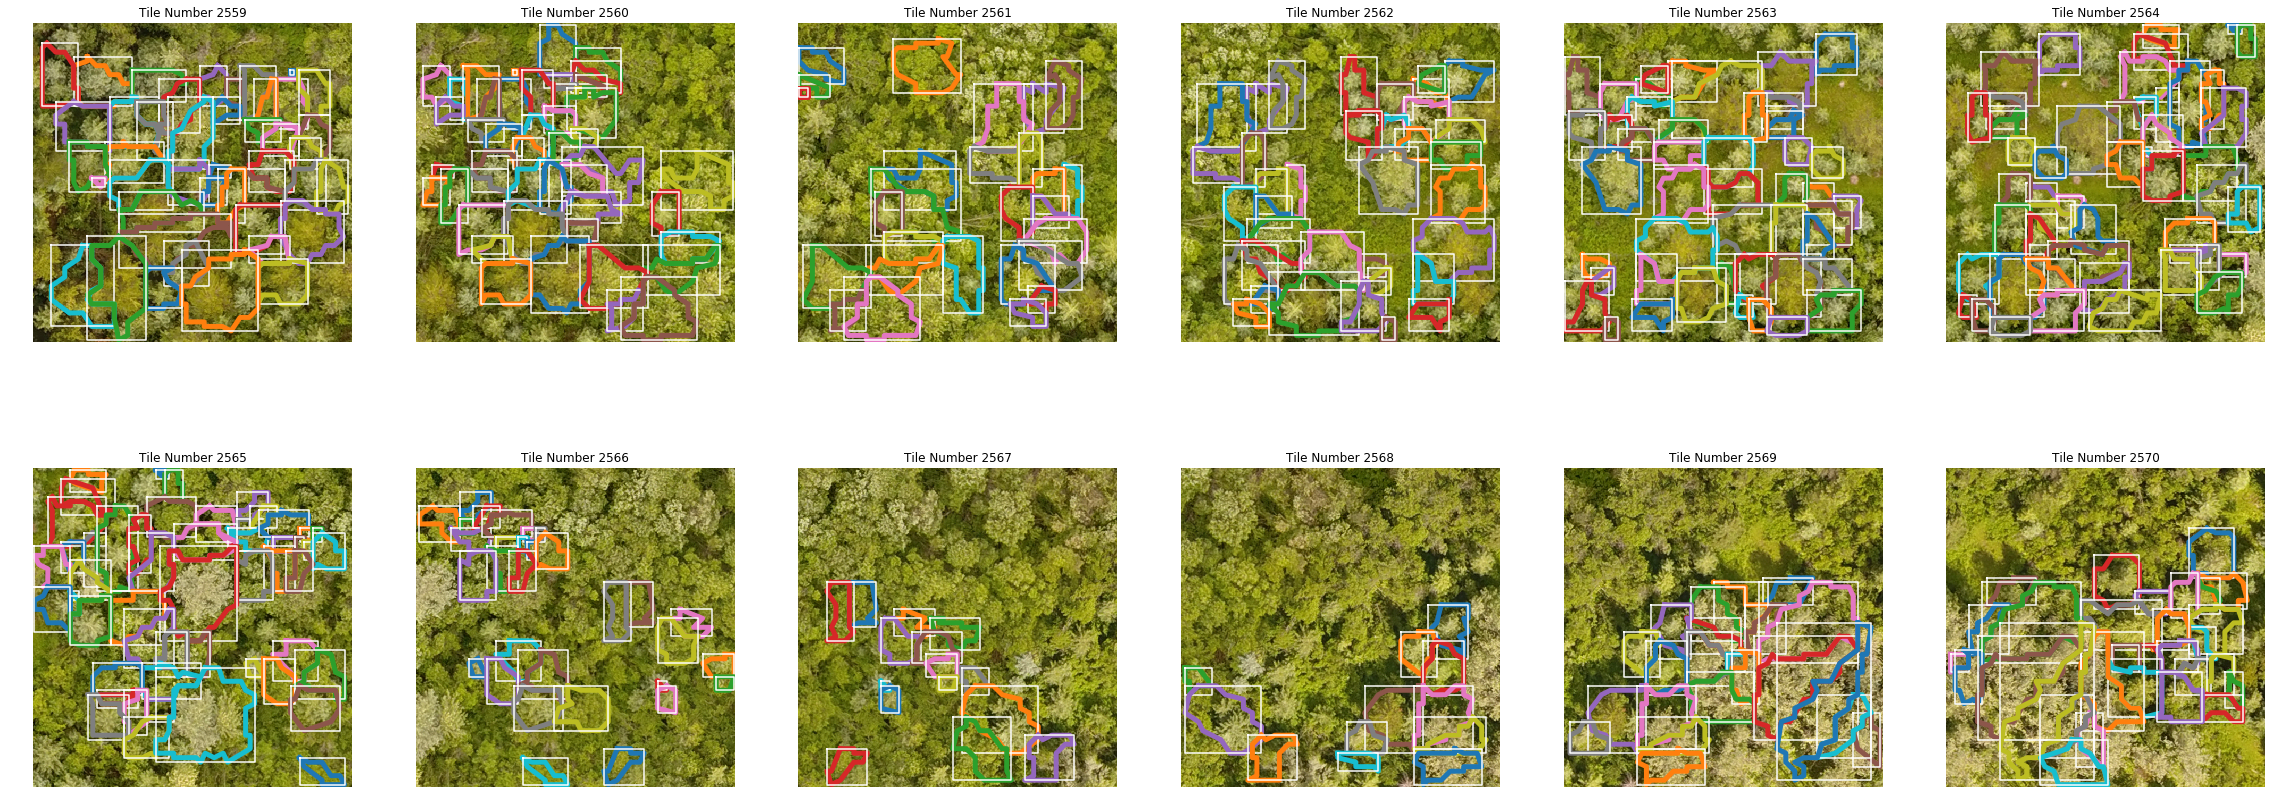

In [32]:
fig, axes = plt.subplots(2,6, figsize=(40,15))
t=np.random.randint(0, num_tiles-12)
for ax in axes.ravel():
    
    segs_and_boxes = [(x['segmentation'], x['bbox']) for x in data[t]['annotations']]
    
    img = cv2.imread(data[t]['file_name'])
    ax.set_axis_off()
    ax.imshow(img)
    ax.set_title(f'Tile Number {t}')
    for seg, bbox in segs_and_boxes:
        ax.plot(*reshape_polygon(seg), linewidth=5)
        ax.plot(*conv_bbox(bbox), c='w')
    t += 1

['',
 '/home/ubuntu/src/cntk/bindings/python',
 '/home/ubuntu/drone-tree-id',
 '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python36.zip',
 '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6',
 '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/lib-dynload',
 '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages',
 '/home/ubuntu/drone-tree-id/lib/detectron2',
 '/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/IPython/extensions',
 '/home/ubuntu/.ipython']